Niniejszy notatnik dotyczy danych z eyetrackera — obejmuje informacje o fiksacjach, sakkadach, obszarach zainteresowania (AOI) oraz innych powiązanych parametrach.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Kwestionariusz

Dane z kwestionariusza ankiety

## Wczytanie dancyh

In [2]:
ankieta = pd.read_csv("MGR/Kwestionariusz_ocena.csv")

## Czyszenie danych

In [3]:
missing = ankieta.isnull().sum()
missing[missing > 0]

ID                       5
plec                     5
wiek                     5
miejsce_zamieszaknia     5
znajomosc_sztuki         5
sytuacja_materialna      5
grupa                    5
obraz1_gust              5
obraz1_przeslanie        5
obraz1_piekno            5
obraz1_wartosc           5
obraz2_gust              5
obraz2_przeslanie        5
obraz2_piekno            5
obraz2_wartosc           5
obraz3_gust              5
obraz3_przeslanie        5
obraz3_piekno            5
obraz3_wartosc           5
obraz4_gust              5
obraz4_przeslanie        5
obraz4_piekno            5
obraz4_wartosc           5
obraz5_gust              5
obraz5_przeslanie        5
obraz5_piekno            5
obraz5_wartosc           5
obraz6_gust              5
obraz6_przeslanie        5
obraz6_piekno            5
obraz6_wartosc           5
obraz7_gust              5
obraz7_przeslanie        5
obraz7_piekno            5
obraz7_wartosc           5
obraz8_gust              5
obraz8_przeslanie        5
o

Usuniemy wiersze z nullami (te gdzie nie miałyśmy ankiet) oraz te, które nie weszły do badania (1 i 29)

In [4]:
ankieta = ankieta.dropna(how='all')
ankieta = ankieta[ankieta.ID != 1]
ankieta = ankieta[ankieta.ID != 29]

missing = ankieta.isnull().sum()
missing[missing > 0]

uwagi    11
dtype: int64

Braki mamy teraz tylko w uwagach, reszta wygląda w porządku

In [5]:
# zmiana typu na int - dla danych numerycznych, tak by je ujednolicić

cols_to_int= ['ID', 'sytuacja_materialna','obraz1_gust', 'obraz1_przeslanie',
       'obraz1_piekno', 'obraz1_wartosc', 'obraz2_gust', 'obraz2_przeslanie',
       'obraz2_piekno', 'obraz2_wartosc', 'obraz3_gust', 'obraz3_przeslanie',
       'obraz3_piekno', 'obraz3_wartosc', 'obraz4_gust', 'obraz4_przeslanie',
       'obraz4_piekno', 'obraz4_wartosc', 'obraz5_gust', 'obraz5_przeslanie',
       'obraz5_piekno', 'obraz5_wartosc', 'obraz6_gust', 'obraz6_przeslanie',
       'obraz6_piekno', 'obraz6_wartosc', 'obraz7_gust', 'obraz7_przeslanie',
       'obraz7_piekno', 'obraz7_wartosc', 'obraz8_gust', 'obraz8_przeslanie',
       'obraz8_piekno', 'obraz8_wartosc']
for col in cols_to_int:
    ankieta[col] = ankieta[col].astype(int)


ankieta = ankieta.drop(columns=['wiek', 'uwagi'])
ankieta.sample(5)

,ID,plec,miejsce_zamieszaknia,znajomosc_sztuki,sytuacja_materialna,grupa,obraz1_gust,obraz1_przeslanie,obraz1_piekno,obraz1_wartosc,...,obraz6_piekno,obraz6_wartosc,obraz7_gust,obraz7_przeslanie,obraz7_piekno,obraz7_wartosc,obraz8_gust,obraz8_przeslanie,obraz8_piekno,obraz8_wartosc
11,12,m,dom_rodzinny,ograniczona,2,e,4,2,4,3,...,2,2,4,3,4,3,5,4,4,1
10,11,k,dom_rodzinny,ograniczona,2,e,4,2,4,3,...,5,3,5,3,5,4,3,1,3,1
19,20,m,inne,ograniczona,0,e,4,2,4,4,...,2,2,4,3,4,3,5,4,5,1
26,27,m,dom_rodzinny,brak,3,k,2,2,3,2,...,2,1,4,3,4,4,3,4,3,4
5,6,m,dom_rodzinny,ograniczona,2,k,2,1,3,2,...,2,2,3,1,3,2,4,3,4,3


# Dane eyetrackingowe
Dane z progamu Tobii Pro Lab.

## Wczytanie danych

In [6]:
tobii = pd.read_csv("MGR/mgr_project_Data_export.tsv", sep="\t")

C:\Users\jcich\AppData\Local\Temp\ipykernel_22096\4128385934.py:1: DtypeWarning: Columns (66,67,68,69,70,71,73,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  tobii = pd.read_csv("MGR/mgr_project_Data_export.tsv", sep="\t")


In [7]:
pd.options.display.max_columns = None
tobii.sample(5)

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,Recording start time UTC,Recording duration,Timeline name,Recording Fixation filter name,Recording software version,Recording resolution height,Recording resolution width,Recording monitor latency,Average calibration accuracy (mm),Average calibration precision SD (mm),Average calibration precision RMS (mm),Average calibration accuracy (degrees),Average calibration precision SD (degrees),Average calibration precision RMS (degrees),Average calibration accuracy (pixels),Average calibration precision SD (pixels),Average calibration precision RMS (pixels),Average validation accuracy (mm),Average validation precision SD (mm),Average validation precision RMS (mm),Average validation accuracy (degrees),Average validation precision SD (degrees),Average validation precision RMS (degrees),Average validation accuracy (pixels),Average validation precision SD (pixels),Average validation precision RMS (pixels),Eyetracker timestamp,Event,Event value,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil diameter left,Pupil diameter right,Pupil diameter filtered,Validity left,Validity right,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Eye position right X (DACSmm),Eye position right Y (DACSmm),Eye position right Z (DACSmm),Gaze point left X (DACSmm),Gaze point left Y (DACSmm),Gaze point right X (DACSmm),Gaze point right Y (DACSmm),Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze point left X (MCSnorm),Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Presented Stimulus name,Presented Media name,Presented Media width,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Eye movement type,Eye movement event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Ungrouped,AOI hit [Frame 14 - NIEZNANE],AOI hit [Frame 8 - obraz AI],AOI hit [Frame 13 - obraz AI],AOI hit [Frame 7 (1) - obraz AI],AOI hit [Frame 5 - obraz AI],AOI hit [Frame 14 - obraz AI],AOI hit [Frame 12 - obraz AI],AOI hit [Frame 6 - obraz AI],AOI hit [Frame 15 - obraz AI],AOI hit [Frame 10 - obraz LUDZKI],AOI hit [Frame 1 (1) - obraz LUDZKI],AOI hit [Frame 4 - obraz LUDZKI],AOI hit [Frame 3 (1) - obraz LUDZKI],AOI hit [Frame 16 - obraz LUDZKI],AOI hit [Frame 11 - obraz LUDZKI],AOI hit [Frame 2 (5) - obraz LUDZKI],AOI hit [Frame 1 (1) - podpis AI],AOI hit [Frame 5 - podpis AI],AOI hit [Frame 4 - podpis LUDZKI],AOI hit [Frame 7 (1) - podpis LUDZKI],AOI hit [Frame 10 - podpis NIEZNANE],AOI hit [Frame 8 - podpis NIEZNANE],AOI hit [Frame 13 - podpis NIEZNANE],AOI hit [Frame 3 (1) - podpis NIEZNANE],AOI hit [Frame 16 - podpis NIEZNANE],AOI hit [Frame 11 - podpis NIEZNANE],AOI hit [Frame 12 - podpis NIEZNANE],AOI hit [Frame 6 - podpis NIEZNANE],AOI hit [Frame 15 - podpis NIEZNANE],AOI hit [Frame 2 (5) - podpis NIEZNANE],Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
583691,536183786,169750303145,Eye Tracker,mgr_project,24.04.2025,26,Recording20,31.03.2025,31.03.2025,13:39:23.353,11:39:23.353,560694,1k,Tobii I-VT (Fixation),24.21.435,1080,1920,"10,00","11,1",NaN,NaN,"0,89",NaN,NaN,40,NaN,NaN,"5,3","11,5","7,4","0,45","0,95","0,61",19,42,27,7.806651e+08,NaN,NaN,962.0,617.0,968.0,616.0,955.0,617.0,"0,06898","0,13583","-0,98833","-0,02811","0,13280","-0,99074","2,747","3,246","2,991",Valid,Valid,"220,1","95,7","681,0","283,3","98,4","679,9","267,6","189,3","264,0","189,5","0,50

## Czyszczenie danych

Przygotujemy dane tak, by łatwo było na nich pracować, Zaczniemy od usunięcia wszystkich kolumn, które mają wartości NaN tylko i wyłącznie

In [8]:
tobii = tobii.dropna(axis=1, how='all')

In [9]:
missing_cols = tobii.columns[tobii.isnull().any()].tolist()
print(missing_cols)
missing_summary = pd.DataFrame({
    'Kolumna': tobii.columns,
    'Brakujące dane [%]': tobii.isnull().mean() * 100
})
pd.set_option('display.max_rows', None) 
missing_summary

['Sensor', 'Eyetracker timestamp', 'Event', 'Event value', 'Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y', 'Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X', 'Gaze direction right Y', 'Gaze direction right Z', 'Pupil diameter left', 'Pupil diameter right', 'Pupil diameter filtered', 'Validity left', 'Validity right', 'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)', 'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)', 'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)', 'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 'Presented Stimulus name', 'Presented Media name', 'Presented Medi

,Kolumna,Brakujące dane [%]
Recording timestamp,Recording timestamp,0.000000
Computer timestamp,Computer timestamp,0.000000
Sensor,Sensor,0.488324
Project name,Project name,0.000000
Export date,Export date,0.000000
Participant name,Participant name,0.000000
Recording name,Recording name,0.000000
Recording date,Recording date,0.000000
Recording date UTC,Recording date UTC,0.000000
Recording start time,Recording start time,0.000000


Usuniemy kolumny, które nie są istotne w dalszej analizie.

In [10]:
col_to_delete = ['Computer timestamp', 'Eyetracker timestamp', 'Project name', 'Export date', 'Recording name', 'Recording date', 'Recording date UTC', 'Recording start time', 
'Recording start time UTC', 'Recording Fixation filter name', 'Recording software version', 'Recording resolution height', 'Recording resolution width', 'Recording monitor latency',
'Average validation precision SD (mm)', 'Average validation precision RMS (mm)', 'Average validation precision SD (degrees)', 'Average validation precision RMS (degrees)', 'Average validation precision SD (pixels)', 'Average validation precision RMS (pixels)',
 'Event', 'Event value', 'Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y', 'Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X',
 'Gaze direction right Y', 'Gaze direction right Z', 'Pupil diameter left', 'Pupil diameter right', 'Pupil diameter filtered', 'Validity left', 'Validity right', 'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)', 
 'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)', 'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)', 'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)', 
 'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)' , 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 'Presented Media name', 'Presented Media width', 'Presented Media height' ,'Presented Media position X (DACSpx)',
 'Presented Media position Y (DACSpx)', 'Original Media width', 'Original Media height', 'Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)', 'Mouse position X', 'Mouse position Y']

tobii = tobii.drop(columns=col_to_delete)

Warto też przyjrzeć się wartościom w różnych kolumnach - pozbyć się wartości nieistotnych w analizie i ujednolicić pozostałe

In [11]:
tobii['Presented Stimulus name'].unique()

array([nan, 'Eyetracker Calibration', 'Text (3)', 'Text (2)', 'Text (1)',
       'Text', 'Frame 15', 'PYTANIA LIKERT (', 'Frame 16', 'Frame 10',
       'Frame 11', 'Frame 14', 'Frame 2 (', 'Frame 13', 'Frame 12',
       'Powitanie (1)', 'Objaśnienie badania (1)',
       'Objaśnienie badania 2', 'Kliknij by rozpocząć', 'Obraz 1',
       'Frame 8', 'Wskaż badaczowi... 1', 'Obraz 2', 'Frame 1',
       'Wskaż badaczowi... 2', 'Obraz 3', 'Frame 3',
       'Wskaż badaczowi... 3', 'Obraz 4', 'Frame 4',
       'Wskaż badaczowi... 4', 'Obraz 5', 'Frame 7',
       'Wskaż badaczowi... 5', 'Obraz 6', 'Wskaż badaczowi... 6',
       'Obraz 7', 'Frame 6', 'Wskaż badaczowi... 7', 'Obraz 8', 'Frame 5',
       'Wskaż badaczowi... 8', 'Podziękowania'], dtype=object)

In [12]:
tobii['Sensor'].unique()

array([nan, 'Eye Tracker', 'Mouse'], dtype=object)

In [13]:
tobii['Eye movement type'].unique()

array([nan, 'EyesNotFound', 'Fixation', 'Saccade', 'Unclassified'],
      dtype=object)

In [14]:
values_to_remove_stimulus_name = ['PYTANIA LIKERT (', 'Eyetracker Calibration', 'Text (3)', 'Text (2)',
'Text (1)', 'Text', 'Powitanie (1)', 'Objaśnienie badania (1)', 'Objaśnienie badania 2',
'Kliknij by rozpocząć', 'Wskaż badaczowi... 1',  'Wskaż badaczowi... 2',  'Wskaż badaczowi... 3',
 'Wskaż badaczowi... 4',  'Wskaż badaczowi... 5',  'Wskaż badaczowi... 6',  'Wskaż badaczowi... 7',
  'Wskaż badaczowi... 8', 'Podziękowania'] 
tobii = tobii[~tobii['Presented Stimulus name'].isin(values_to_remove_stimulus_name)]

values_to_remove_sensor = ['Mouse']
tobii = tobii[~tobii['Sensor'].isin(values_to_remove_sensor)]

values_to_remove_eyeMovementType = ['Unclassified', 'EyesNotFound']
tobii = tobii[~tobii['Eye movement type'].isin(values_to_remove_eyeMovementType)]

In [15]:
tobii = tobii.dropna(subset=['Presented Stimulus name'])

In [16]:
#ujednolicenie nazw wartości dla "Presented Stimulus name" i "Timeline name"

dict_stimulus = {
   'Frame 15': 1,
    'Frame 16': 2,
    'Frame 10':  3,
    'Frame 11': 4,
    'Frame 14':  5,
    'Frame 2 (': 6,
    'Frame 13': 7,
    'Frame 12': 8,
    'Obraz 1': 1,
    'Frame 8': 1,
    'Obraz 2': 2,
    'Frame 1': 2,
    'Obraz 3': 3,
    'Frame 3': 3,
    'Obraz 4': 4,
    'Frame 4': 4,
    'Obraz 5': 5,
    'Frame 7': 5,
    'Obraz 6': 6,
    'Obraz 7': 7,
    'Frame 6': 7,
    'Obraz 8': 8,
    'Frame 5': 8
}

dict_timeline = {
    "1k": "k",
    "2e": "e"
}

pd.set_option('future.no_silent_downcasting', True)
tobii['Presented Stimulus name'] = tobii['Presented Stimulus name'].replace(dict_stimulus)
tobii['Timeline name'] = tobii['Timeline name'].replace(dict_timeline)

In [17]:
# Zmiana nazw kolumn - na bardziej informatywne

tobii = tobii.rename(columns={
    'Participant name': 'ID',
    'Timeline name': 'Group',
    'Presented Stimulus name': 'Painting',
})

In [18]:
# usunięcie duplikatów (po usunięciu części informacji, część wierszy jest zwyczajnie duplikatami, odnosi się do tej samej informacji)
tobii = tobii.reset_index(drop=True)
tobii = tobii.drop_duplicates()

In [19]:
tobii.head(40)

,Recording timestamp,Sensor,ID,Recording duration,Group,Average calibration accuracy (mm),Average calibration accuracy (degrees),Average calibration accuracy (pixels),Average validation accuracy (mm),Average validation accuracy (degrees),Average validation accuracy (pixels),Painting,Eye movement type,Eye movement event duration,Eye movement type index,Fixation point X,Fixation point Y,AOI hit [Frame 14 - NIEZNANE],AOI hit [Frame 8 - obraz AI],AOI hit [Frame 13 - obraz AI],AOI hit [Frame 7 (1) - obraz AI],AOI hit [Frame 5 - obraz AI],AOI hit [Frame 14 - obraz AI],AOI hit [Frame 12 - obraz AI],AOI hit [Frame 6 - obraz AI],AOI hit [Frame 15 - obraz AI],AOI hit [Frame 10 - obraz LUDZKI],AOI hit [Frame 1 (1) - obraz LUDZKI],AOI hit [Frame 4 - obraz LUDZKI],AOI hit [Frame 3 (1) - obraz LUDZKI],AOI hit [Frame 16 - obraz LUDZKI],AOI hit [Frame 11 - obraz LUDZKI],AOI hit [Frame 2 (5) - obraz LUDZKI],AOI hit [Frame 1 (1) - podpis AI],AOI hit [Frame 5 - podpis AI],AOI hit [Frame 4 - podpis LUDZKI],AOI hit [Frame 7 (1) - podpis LUDZKI],AOI hit [Frame 10 - podpis NIEZNANE],AOI hit [Frame 8 - podpis NIEZNANE],AOI hit [Frame 13 - podpis NIEZNANE],AOI hit [Frame 3 (1) - podpis NIEZNANE],AOI hit [Frame 16 - podpis NIEZNANE],AOI hit [Frame 11 - podpis NIEZNANE],AOI hit [Frame 12 - podpis NIEZNANE],AOI hit [Frame 6 - podpis NIEZNANE],AOI hit [Frame 15 - podpis NIEZNANE],AOI hit [Frame 2 (5) - podpis NIEZNANE]
0,92280954,Eye Tracker,3,425385,k,"9,7","0,79",35,"7,9","0,67",28,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,92297608,Eye Tracker,3,425385,k,"9,7","0,79",35,"7,9","0,67",28,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,92314262,Eye Tracker,3,425385,k,"9,7","0,79",35,"7,9","0,67",28,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,92330917,Eye Tracker,3,425385,k,"9,7","0,79",35,"7,9","0,67",28,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,92347571,Eye Tracker,3,425385,k,"9,7","0,79",35,"7,9","0,67",28,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
5,92364225,Eye Tracker,3,425385,k,"9,7","0,79",35,"7,9","0,67",28,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
6,92380880,Eye Tracker,3,425385,k,"9,7","0,79",35,"7,9","0,67",28,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
7,92397533,Eye Tracker,3,425385,k,"9,7","0,79",35,"7,9","0,67",28,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
8,92414188,Eye Tracker,3,425385,k,"9,7","0,79",35,"7,9","0,67",28,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
9,92430843,Eye Tracker,3,425385,k,"9,7","0,79",35,"7,9","0,67",28,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [20]:
#zastąpienie nazw kolumn z AOI na bardziej informatywne - z numerem obrazu

# Define your mapping dictionary
dict_frame = {
    'Frame 8': 'obraz_1',
    'Frame 14': 'obraz_5',
    'Frame 13': 'obraz_7',
    'Frame 7 (1)': 'obraz_5',
    'Frame 5': 'obraz_8',
    'Frame 14': 'obraz_5',
    'Frame 12': 'obraz_8',
    'Frame 6': 'obraz_7',
    'Frame 15': 'obraz_1',
    'Frame 10': 'obraz_3',
    'Frame 1 (1)': 'obraz_2',
    'Frame 4': 'obraz_4', 
    'Frame 3 (1)': 'obraz_3', 
    'Frame 16': 'obraz_2',
    'Frame 11': 'obraz_4' ,
    'Frame 2 (5)': 'obraz_6',
    'Frame 1 (1)': 'obraz_2',
    'Frame 5': 'obraz_8',
    'Frame 4': 'obraz_4',
    'Frame 7 (1)': 'obraz_5',
    'Frame 10': 'obraz_3',
    'Frame 8': 'obraz_1',
    'Frame 13': 'obraz_7',
    'Frame 3 (1)': 'obraz_3', 
    'Frame 16': 'obraz_2',
    'Frame 11': 'obraz_4',
    'Frame 12': 'obraz_8',
    'Frame 6': 'obraz_7',
    'Frame 15': 'obraz_1',
    'Frame 2 (5)': 'obraz_6' 
}

#zastąpienie odpowiedniej części nazwy kolumny
for old, new in dict_frame.items():
    tobii.columns = [col.replace(old, new) for col in tobii.columns]

tobii.sample(5)

,Recording timestamp,Sensor,ID,Recording duration,Group,Average calibration accuracy (mm),Average calibration accuracy (degrees),Average calibration accuracy (pixels),Average validation accuracy (mm),Average validation accuracy (degrees),Average validation accuracy (pixels),Painting,Eye movement type,Eye movement event duration,Eye movement type index,Fixation point X,Fixation point Y,AOI hit [obraz_5 - NIEZNANE],AOI hit [obraz_1 - obraz AI],AOI hit [obraz_7 - obraz AI],AOI hit [obraz_5 - obraz AI],AOI hit [obraz_8 - obraz AI],AOI hit [obraz_5 - obraz AI],AOI hit [obraz_8 - obraz AI],AOI hit [obraz_7 - obraz AI],AOI hit [obraz_1 - obraz AI],AOI hit [obraz_3 - obraz LUDZKI],AOI hit [obraz_2 - obraz LUDZKI],AOI hit [obraz_4 - obraz LUDZKI],AOI hit [obraz_3 - obraz LUDZKI],AOI hit [obraz_2 - obraz LUDZKI],AOI hit [obraz_4 - obraz LUDZKI],AOI hit [obraz_6 - obraz LUDZKI],AOI hit [obraz_2 - podpis AI],AOI hit [obraz_8 - podpis AI],AOI hit [obraz_4 - podpis LUDZKI],AOI hit [obraz_5 - podpis LUDZKI],AOI hit [obraz_3 - podpis NIEZNANE],AOI hit [obraz_1 - podpis NIEZNANE],AOI hit [obraz_7 - podpis NIEZNANE],AOI hit [obraz_3 - podpis NIEZNANE],AOI hit [obraz_2 - podpis NIEZNANE],AOI hit [obraz_4 - podpis NIEZNANE],AOI hit [obraz_8 - podpis NIEZNANE],AOI hit [obraz_7 - podpis NIEZNANE],AOI hit [obraz_1 - podpis NIEZNANE],AOI hit [obraz_6 - podpis NIEZNANE]
133345,202849867,Eye Tracker,25,362767,e,"12,4","0,95",45,"7,2","0,57",26,4,Fixation,183.0,582.0,846.0,611.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42472,341311527,Eye Tracker,9,400957,k,"11,4","0,92",41,"6,2","0,52",22,7,Fixation,217.0,935.0,625.0,779.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96551,269227943,Eye Tracker,8,568165,e,"5,0","0,38",18,"5,6","0,46",20,3,Fixation,450.0,762.0,965.0,621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6407,393223559,Eye Tracker,3,425385,k,"9,7","0,79",35,"7,9","0,67",28,8,Fixation,400.0,1301.0,1221.0,372.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
135525,271898570,Eye Tracker,25,362767,e,"12,4","0,95",45,"7,2","0,57",26,6,Fixation,766.0,820.0,905.0,453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


Wygląda na to, że część danych nie jest konieczna do analizy - może przydać się jednak później (dane dotyczące dokładności) - możemy trzymać je w innym data frame'ie

In [21]:
# kolumny do nowego df
accuracy_df_col = ['ID', 'Average calibration accuracy (mm)', 'Average calibration accuracy (degrees)', 'Average calibration accuracy (pixels)', 'Average validation accuracy (mm)','Average validation accuracy (degrees)','Average validation accuracy (pixels)'] 

df_accuracy = tobii[accuracy_df_col].drop_duplicates()

# wyczyszczenie reszty danych
tobii = tobii.drop(columns=[col for col in accuracy_df_col if col != 'ID'])


Połączymy teraz dane, tak by mieć je razem - wraz z ankietą (by widzieć szerszy kontekst i prowadzić szerszą analizę)

In [22]:
merged_df = pd.merge(tobii, ankieta, on='ID', how='inner')
merged_df.head(50)

,Recording timestamp,Sensor,ID,Recording duration,Group,Painting,Eye movement type,Eye movement event duration,Eye movement type index,Fixation point X,Fixation point Y,AOI hit [obraz_5 - NIEZNANE],AOI hit [obraz_1 - obraz AI],AOI hit [obraz_7 - obraz AI],AOI hit [obraz_5 - obraz AI],AOI hit [obraz_8 - obraz AI],AOI hit [obraz_5 - obraz AI],AOI hit [obraz_8 - obraz AI],AOI hit [obraz_7 - obraz AI],AOI hit [obraz_1 - obraz AI],AOI hit [obraz_3 - obraz LUDZKI],AOI hit [obraz_2 - obraz LUDZKI],AOI hit [obraz_4 - obraz LUDZKI],AOI hit [obraz_3 - obraz LUDZKI],AOI hit [obraz_2 - obraz LUDZKI],AOI hit [obraz_4 - obraz LUDZKI],AOI hit [obraz_6 - obraz LUDZKI],AOI hit [obraz_2 - podpis AI],AOI hit [obraz_8 - podpis AI],AOI hit [obraz_4 - podpis LUDZKI],AOI hit [obraz_5 - podpis LUDZKI],AOI hit [obraz_3 - podpis NIEZNANE],AOI hit [obraz_1 - podpis NIEZNANE],AOI hit [obraz_7 - podpis NIEZNANE],AOI hit [obraz_3 - podpis NIEZNANE],AOI hit [obraz_2 - podpis NIEZNANE],AOI hit [obraz_4 - podpis NIEZNANE],AOI hit [obraz_8 - podpis NIEZNANE],AOI hit [obraz_7 - podpis NIEZNANE],AOI hit [obraz_1 - podpis NIEZNANE],AOI hit [obraz_6 - podpis NIEZNANE],plec,miejsce_zamieszaknia,znajomosc_sztuki,sytuacja_materialna,grupa,obraz1_gust,obraz1_przeslanie,obraz1_piekno,obraz1_wartosc,obraz2_gust,obraz2_przeslanie,obraz2_piekno,obraz2_wartosc,obraz3_gust,obraz3_przeslanie,obraz3_piekno,obraz3_wartosc,obraz4_gust,obraz4_przeslanie,obraz4_piekno,obraz4_wartosc,obraz5_gust,obraz5_przeslanie,obraz5_piekno,obraz5_wartosc,obraz6_gust,obraz6_przeslanie,obraz6_piekno,obraz6_wartosc,obraz7_gust,obraz7_przeslanie,obraz7_piekno,obraz7_wartosc,obraz8_gust,obraz8_przeslanie,obraz8_piekno,obraz8_wartosc
0,92280954,Eye Tracker,3,425385,k,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,k,mieszkanie_wynajmowane,ograniczona,2,k,4,3,4,3,5,4,4,4,3,4,3,3,4,3,4,2,4,3,4,3,3,3,4,2,5,4,5,3,4,4,4,4
1,92297608,Eye Tracker,3,425385,k,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,k,mieszkanie_wynajmowane,ograniczona,2,k,4,3,4,3,5,4,4,4,3,4,3,3,4,3,4,2,4,3,4,3,3,3,4,2,5,4,5,3,4,4,4,4
2,92314262,Eye Tracker,3,425385,k,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,k,mieszkanie_wynajmowane,ograniczona,2,k,4,3,4,3,5,4,4,4,3,4,3,3,4,3,4,2,4,3,4,3,3,3,4,2,5,4,5,3,4,4,4,4
3,92330917,Eye Tracker,3,425385,k,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,k,mieszkanie_wynajmowane,ograniczona,2,k,4,3,4,3,5,4,4,4,3,4,3,3,4,3,4,2,4,3,4,3,3,3,4,2,5,4,5,3,4,4,4,4
4,92347571,Eye Tracker,3,425385,k,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,k,mieszkanie_wynajmowane,ograniczona,2,k,4,3,4,3,5,4,4,4,3,4,3,3,4,3,4,2,4,3,4,3,3,3,4,2,5,4,5,3,4,4,4,4
5,92364225,Eye Tracker,3,425385,k,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,k,mieszkanie_wynajmowane,ograniczona,2,k,4,3,4,3,5,4,4,4,3,4,3,3,4,3,4,2,4,3,4,3,3,3,4,2,5,4,5,3,4,4,4,4
6,92380880,Eye Tracker,3,425385,k,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,k,mieszkanie_wynajmowane,ograniczona,2,k,4,3,4,3,5,4,4,4,3,4,3,3,4,3,4,2,4,3,4,3,3,3,4,2,5,4,5,3,4,4,4,4
7,92397533,Eye Tracker,3,425385,k,1,Fixation,683.0,298.0,955.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,k,mieszkanie_wynajmowane,ograniczona,2,k,4,3,4,3,5,4,4,4,3,4,3,

In [23]:
merged_df.describe()

,Recording timestamp,ID,Recording duration,Eye movement event duration,Eye movement type index,Fixation point X,Fixation point Y,AOI hit [obraz_5 - NIEZNANE],AOI hit [obraz_1 - obraz AI],AOI hit [obraz_7 - obraz AI],AOI hit [obraz_5 - obraz AI],AOI hit [obraz_8 - obraz AI],AOI hit [obraz_5 - obraz AI],AOI hit [obraz_8 - obraz AI],AOI hit [obraz_7 - obraz AI],AOI hit [obraz_1 - obraz AI],AOI hit [obraz_3 - obraz LUDZKI],AOI hit [obraz_2 - obraz LUDZKI],AOI hit [obraz_4 - obraz LUDZKI],AOI hit [obraz_3 - obraz LUDZKI],AOI hit [obraz_2 - obraz LUDZKI],AOI hit [obraz_4 - obraz LUDZKI],AOI hit [obraz_6 - obraz LUDZKI],AOI hit [obraz_2 - podpis AI],AOI hit [obraz_8 - podpis AI],AOI hit [obraz_4 - podpis LUDZKI],AOI hit [obraz_5 - podpis LUDZKI],AOI hit [obraz_3 - podpis NIEZNANE],AOI hit [obraz_1 - podpis NIEZNANE],AOI hit [obraz_7 - podpis NIEZNANE],AOI hit [obraz_3 - podpis NIEZNANE],AOI hit [obraz_2 - podpis NIEZNANE],AOI hit [obraz_4 - podpis NIEZNANE],AOI hit [obraz_8 - podpis NIEZNANE],AOI hit [obraz_7 - podpis NIEZNANE],AOI hit [obraz_1 - podpis NIEZNANE],AOI hit [obraz_6 - podpis NIEZNANE],sytuacja_materialna,obraz1_gust,obraz1_przeslanie,obraz1_piekno,obraz1_wartosc,obraz2_gust,obraz2_przeslanie,obraz2_piekno,obraz2_wartosc,obraz3_gust,obraz3_przeslanie,obraz3_piekno,obraz3_wartosc,obraz4_gust,obraz4_przeslanie,obraz4_piekno,obraz4_wartosc,obraz5_gust,obraz5_przeslanie,obraz5_piekno,obraz5_wartosc,obraz6_gust,obraz6_przeslanie,obraz6_piekno,obraz6_wartosc,obraz7_gust,obraz7_przeslanie,obraz7_piekno,obraz7_wartosc,obraz8_gust,obraz8_przeslanie,obraz8_piekno,obraz8_wartosc
count,1.730210e+05,173021.000000,173021.000000,173021.000000,173021.000000,149341.000000,149341.000000,10062.000000,10473.000000,10325.000000,10150.000000,10316.000000,10062.000000,10182.000000,10144.000000,10278.000000,10182.000000,10420.000000,10250.000000,10264.000000,10345.000000,10149.000000,20456.000000,10420.000000,10316.000000,10250.000000,10150.000000,10182.000000,10473.000000,10325.000000,10264.000000,10345.000000,10149.000000,10182.000000,10144.000000,10278.000000,20456.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.000000,173021.00000
mean,2.870983e+08,16.478271,467492.739043,343.881165,907.035805,936.483431,472.065448,0.011628,0.837678,0.856949,0.814384,0.808065,0.836613,0.861422,0.840398,0.839366,0.829798,0.797601,0.756098,0.832521,0.848139,0.826879,0.849286,0.053935,0.039841,0.075902,0.026995,0.003143,0.021197,0.011622,0.014419,0.012663,0.014583,0.005500,0.016167,0.025491,0.012710,1.861554,3.475532,2.180250,3.411956,2.875125,3.363967,2.320192,3.447622,2.336901,2.436253,3.117575,2.463048,2.780743,3.676190,3.133660,3.999601,3.057571,3.680438,2.301518,4.001537,3.307067,2.579935,2.267644,2.928153,2.445536,4.037238,2.742135,4.328740,3.233862,3.892279,2.950457,4.072864,2.67386
std,1.135970e+08,8.824006,70493.321967,405.412563,434.664637,210.460735,213.004471,0.107209,0.368764,0.350142,0.388815,0.393841,0.369737,0.345522,0.366254,0.367211,0.375829,0.401808,0.429456,0.373421,0.358903,0.378370,0.357778,0.225900,0.195595,0.264855,0.162077,0.055975,0.144049,0.107184,0.119217,0.111821,0.119881,0.073961,0.126124,0.157620,0.112024,0.736147,0.703344,0.849131,0.814744,0.919604,0.988395,1.204549,0.764149,1.107046,1.150531,0.986480,1.160591,0.912310,0.680619,0.932383,0.564809,0.881394,1.101842,1.106958,1.064001,1.218246,1.159950,1.093692,1.117462,0.833345,0.927642,0.921503,0.806088,0.655663,1.044475,1.195755,0.817465,1.28311
min,7.924183e+07,2.000000,362767.000000,17.000000,176.000000,-363.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

Uzupełnienie danych o informacje o obrazie

In [24]:
mapa_podpisow = {
    1: "nieznane_AI",
    2: "fałszywe_ludzkie",
    3: "nieznane_ludzkie",
    4: "prawdziwe_ludzkie",
    5: "fałszywe_AI",
    6: "nieznane_ludzkie",
    7: "nieznane_AI",
    8: "prawdziwe_AI"
}

merged_df['typ_podpisu'] = merged_df['Painting'].map(mapa_podpisow)
merged_df['podpis'] = merged_df['typ_podpisu'].str.split('_').str[0]
merged_df['autor'] = merged_df['typ_podpisu'].str.split('_').str[1]
merged_df.sample(7)


,Recording timestamp,Sensor,ID,Recording duration,Group,Painting,Eye movement type,Eye movement event duration,Eye movement type index,Fixation point X,Fixation point Y,AOI hit [obraz_5 - NIEZNANE],AOI hit [obraz_1 - obraz AI],AOI hit [obraz_7 - obraz AI],AOI hit [obraz_5 - obraz AI],AOI hit [obraz_8 - obraz AI],AOI hit [obraz_5 - obraz AI],AOI hit [obraz_8 - obraz AI],AOI hit [obraz_7 - obraz AI],AOI hit [obraz_1 - obraz AI],AOI hit [obraz_3 - obraz LUDZKI],AOI hit [obraz_2 - obraz LUDZKI],AOI hit [obraz_4 - obraz LUDZKI],AOI hit [obraz_3 - obraz LUDZKI],AOI hit [obraz_2 - obraz LUDZKI],AOI hit [obraz_4 - obraz LUDZKI],AOI hit [obraz_6 - obraz LUDZKI],AOI hit [obraz_2 - podpis AI],AOI hit [obraz_8 - podpis AI],AOI hit [obraz_4 - podpis LUDZKI],AOI hit [obraz_5 - podpis LUDZKI],AOI hit [obraz_3 - podpis NIEZNANE],AOI hit [obraz_1 - podpis NIEZNANE],AOI hit [obraz_7 - podpis NIEZNANE],AOI hit [obraz_3 - podpis NIEZNANE],AOI hit [obraz_2 - podpis NIEZNANE],AOI hit [obraz_4 - podpis NIEZNANE],AOI hit [obraz_8 - podpis NIEZNANE],AOI hit [obraz_7 - podpis NIEZNANE],AOI hit [obraz_1 - podpis NIEZNANE],AOI hit [obraz_6 - podpis NIEZNANE],plec,miejsce_zamieszaknia,znajomosc_sztuki,sytuacja_materialna,grupa,obraz1_gust,obraz1_przeslanie,obraz1_piekno,obraz1_wartosc,obraz2_gust,obraz2_przeslanie,obraz2_piekno,obraz2_wartosc,obraz3_gust,obraz3_przeslanie,obraz3_piekno,obraz3_wartosc,obraz4_gust,obraz4_przeslanie,obraz4_piekno,obraz4_wartosc,obraz5_gust,obraz5_przeslanie,obraz5_piekno,obraz5_wartosc,obraz6_gust,obraz6_przeslanie,obraz6_piekno,obraz6_wartosc,obraz7_gust,obraz7_przeslanie,obraz7_piekno,obraz7_wartosc,obraz8_gust,obraz8_przeslanie,obraz8_piekno,obraz8_wartosc,typ_podpisu,podpis,autor
29821,93545775,Eye Tracker,22,424242,e,1,Fixation,500.0,233.0,1299.0,716.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,k,dom_rodzinny,profesjonalna,2,e,4,2,4,3,3,3,3,3,2,4,3,4,4,4,4,5,5,4,5,5,1,2,2,2,4,3,4,3,4,2,4,1,nieznane_AI,nieznane,AI
121174,329821260,Eye Tracker,23,435588,e,6,Fixation,250.0,1016.0,1220.0,460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,m,mieszkanie_wynajmowane,ograniczona,1,e,4,2,4,2,4,3,3,3,1,3,1,2,4,4,5,3,3,1,3,1,3,4,2,3,4,2,4,4,3,3,4,3,nieznane_ludzkie,nieznane,ludzkie
5404,357333633,Eye Tracker,3,425385,k,7,Fixation,366.0,1190.0,696.0,635.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,k,mieszkanie_wynajmowane,ograniczona,2,k,4,3,4,3,5,4,4,4,3,4,3,3,4,3,4,2,4,3,4,3,3,3,4,2,5,4,5,3,4,4,4,4,nieznane_AI,nieznane,AI
66935,197537005,Eye Tracker,7,522574,k,2,Fixation,350.0,666.0,1040.0,639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,k,mieszkanie_wynajmowane,ograniczona,2,k,4,3,4,3,5,4,5,4,2,3,2,4,3,3,4,3,4,2,5,4,1,2,2,2,4,3,4,2,5,4,5,3,fałszywe_ludzkie,fałszywe,ludzkie
153066,104126500,Eye Tracker,27,372790,k,1,Fixation,316.0,271.0,1016.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,m,dom_rodzinny,brak,3,k,2,2,3,2,3,2,3,1,4,3,3,3,3,2,3,3,4,3,4,3,3,2,2,1,4,3,4,4,3,4,3,4,nieznane_AI,nieznane,AI
81331,233809100,Eye Tracker,6,499627,k,2,Saccade,67.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,m,dom_rodzinny,ograniczona,2,k,2,1,3,2,3,1,3,2,2,2,2,2,3,2,3,3,2,2,2,3,2,1,2,2,3,1,3,2,4,3,4,3,fałszywe_ludzkie,fałszywe,ludzkie
11620,253691553,Eye Tracker,15,378463,e,5,Fixation,316.0,775.0,1101.0,710.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,k,akademik,hobbystyczna,3,e,3,2,3,4,2,2,3,3,4,4,4,3,5,4,4,4,4,4,3,4,5,4,5,4,5,4,5,3,4,3,4,4,fałszywe_AI,fałszywe,AI


# Analiza 

Analiza ta zostanie przeprowadzona w oparciu o dane dotyczące fiksacji i sakkad

## Ile było średnio sakkad na 1 osobę w obrębie danej grupy dla każdego obrazu?

In [25]:
# Zaczniemy od zliczania sakkad - grupujemy wg osoby, grupy i obrazu (+typ_podpisu)
saccade_counts = (merged_df[merged_df['Eye movement type'] == 'Saccade'].groupby(['Group', 'Painting', 'ID', 'typ_podpisu']).size().reset_index(name='saccade_count'))

# Liczymy średnią liczbę sakkad
avg_saccades = (saccade_counts.groupby(['Group', 'Painting', 'typ_podpisu'])['saccade_count'].mean().reset_index(name='avg_saccades_per_person'))

avg_saccades

,Group,Painting,typ_podpisu,avg_saccades_per_person
0,e,1,nieznane_AI,125.916667
1,e,2,fałszywe_ludzkie,129.250000
2,e,3,nieznane_ludzkie,144.166667
3,e,4,prawdziwe_ludzkie,138.583333
4,e,5,fałszywe_AI,132.750000
5,e,6,nieznane_ludzkie,128.500000
6,e,7,nieznane_AI,127.166667
7,e,8,prawdziwe_AI,128.166667
8,k,1,nieznane_AI,104.500000
9,k,2,fałszywe_ludzkie,111.916667


### Wizualizacja

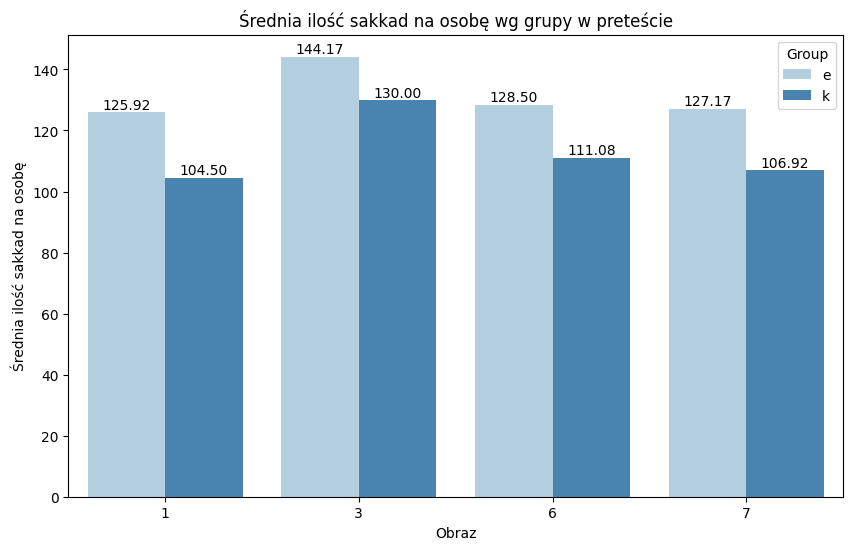

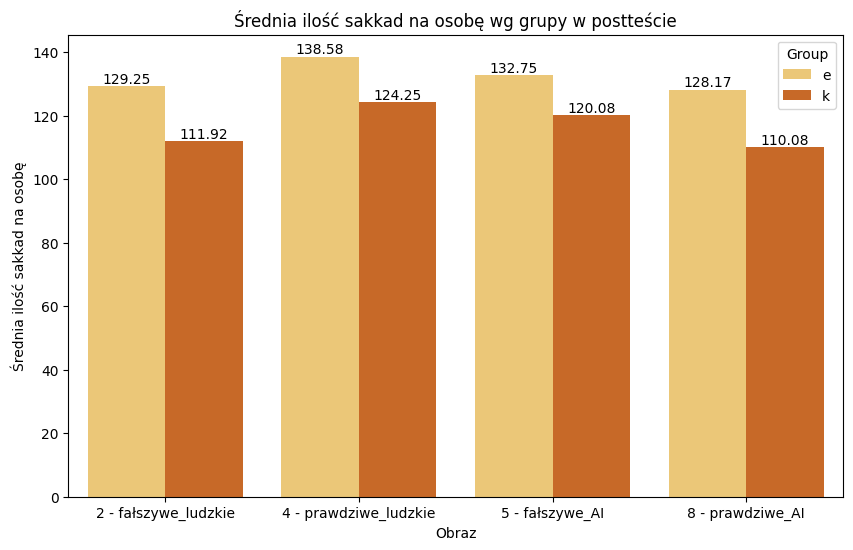

In [29]:
#pretest
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=avg_saccades[avg_saccades['Painting'].isin([1, 3, 6, 7])],
    x='Painting',
    y='avg_saccades_per_person',
    hue='Group',
    palette='Blues',
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
    
plt.ylabel('Średnia ilość sakkad na osobę')
plt.xlabel('Obraz')
plt.title('Średnia ilość sakkad na osobę wg grupy w preteście')
plt.show()

#posttest
avg_saccades['Obraz_typ'] = avg_saccades['Painting'].astype(str) + ' - ' + avg_saccades['typ_podpisu']

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=avg_saccades[avg_saccades['Painting'].isin([2, 4, 5, 8])],
    x='Obraz_typ',
    y='avg_saccades_per_person',
    hue='Group',
    palette='YlOrBr',
   
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
    
plt.ylabel('Średnia ilość sakkad na osobę')
plt.xlabel('Obraz')
plt.title('Średnia ilość sakkad na osobę wg grupy w postteście')
plt.show()

Wniosek:

Grupa eksperymentalna wykonuje więcej sakkad niż kontrolna — zarówno przed, jak i po manipulacji. Może to oznaczać, że grupa e jest ogólnie bardziej eksploracyjna wzrokowo lub że istnieje różnica między grupami niezwiązana z manipulacją. Różnica ta pozostała stabilna po manipulacji.

Przeorowadźmy test statystyczny :)

### Test statystyczny

In [31]:
#pretest
print("PRETEST\n")
for painting in [1, 3, 6, 7]:
    print(f"Obraz {painting}")
    pretest_data = saccade_counts[saccade_counts['Painting'] == painting]
    grupa_e = pretest_data[pretest_data['Group'] == 'e']['saccade_count']
    grupa_k = pretest_data[pretest_data['Group'] == 'k']['saccade_count']

    #sprawdzamy znów najpierw normalność
    s1 = shapiro(grupa_k)
    s2 = shapiro(grupa_e)
    print(f"  Shapiro kontrolna: p = {s1.pvalue:}")
    print(f"  Shapiro eksperymentalna: p = {s2.pvalue:}")
    
    #dobór testu (jeśli pvalue <0.005 - dane odbiegają od normalności), w przeciwnym wypadku - rozkład normalny (brak podstaw, aby odrzucić normalność)
    if s1.pvalue > 0.05 and s2.pvalue > 0.05:
        stat, p = ttest_ind(grupa_k, grupa_e)
        test = "t-test"
    else:
        stat, p = mannwhitneyu(grupa_k, grupa_e)
        test = "Mann-Whitney U"
    print(f"{test}: stat={stat:.3f}, p={p:.4f}\n")

#posttest
print("POSTTEST\n")
for painting in [2,4,5,8]:
    print(f"Obraz {painting}")
    posttest_data = saccade_counts[saccade_counts['Painting'] == painting]
    grupa_e = posttest_data[posttest_data['Group'] == 'e']['saccade_count']
    grupa_k = posttest_data[posttest_data['Group'] == 'k']['saccade_count']

    #sprawdzamy znów najpierw normalność
    s1 = shapiro(grupa_k)
    s2 = shapiro(grupa_e)
    print(f"  Shapiro kontrolna: p = {s1.pvalue:}")
    print(f"  Shapiro eksperymentalna: p = {s2.pvalue:}")
    
    #dobór testu (jeśli pvalue <0.005 - dane odbiegają od normalności), w przeciwnym wypadku - rozkład normalny (brak podstaw, aby odrzucić normalność)
    if s1.pvalue > 0.05 and s2.pvalue > 0.05:
        stat, p = ttest_ind(grupa_k, grupa_e)
        test = "t-test"
    else:
        stat, p = mannwhitneyu(grupa_k, grupa_e)
        test = "Mann-Whitney U"
    print(f"{test}: stat={stat:.3f}, p={p:.4f}\n")

PRETEST

Obraz 1
  Shapiro kontrolna: p = 0.9180932810848774
  Shapiro eksperymentalna: p = 0.012517829608882152
Mann-Whitney U: stat=45.000, p=0.1259

Obraz 3
  Shapiro kontrolna: p = 0.6184783454184194
  Shapiro eksperymentalna: p = 0.0057608046390411885
Mann-Whitney U: stat=57.000, p=0.4023

Obraz 6
  Shapiro kontrolna: p = 0.16423551731331704
  Shapiro eksperymentalna: p = 0.4239523340865151
t-test: stat=-1.818, p=0.0828

Obraz 7
  Shapiro kontrolna: p = 0.009908338471774508
  Shapiro eksperymentalna: p = 0.2804325528288195
Mann-Whitney U: stat=31.500, p=0.0208

POSTTEST

Obraz 2
  Shapiro kontrolna: p = 0.5884661469230544
  Shapiro eksperymentalna: p = 0.8149195799795309
t-test: stat=-2.120, p=0.0455

Obraz 4
  Shapiro kontrolna: p = 0.06607600836626239
  Shapiro eksperymentalna: p = 0.7228071116070374
t-test: stat=-1.295, p=0.2088

Obraz 5
  Shapiro kontrolna: p = 0.9697656518403697
  Shapiro eksperymentalna: p = 0.06974073631077585
t-test: stat=-1.223, p=0.2343

Obraz 8
  Shapir

Wnioski:
- Dla większości obrazów nie było znaczącej różnicy w średniej liczbie sakad na osobę między grupami. Znaczące różnice zaobserwowano tylko dla Obrazu 7 w teście wstępnym i Obrazu 2 w teście końcowym.
- Różnica może być zatem spowodowana np. specyfiką obrazu 

Nie możemy zatem jednoznacznie stwierdzić, że informacja o autorstwie obrazu wpływa konkretnie na długość sakkad podczas jego analizy (z wyjątkiem 2 obrazów, które warto jednak rozważyć w szerszym kontekście)

## Ile było średnio fiksacji na 1 osobę w obrębie danej grupy dla każdego obrazu?

In [32]:
# Zaczniemy od zliczania fiksacji - grupujemy wg osoby, grupy i obrazu (+typ_podpisu)
fixation_counts = (merged_df[merged_df['Eye movement type'] == 'Fixation'].groupby(['Group', 'Painting', 'ID', 'typ_podpisu']).size().reset_index(name='fixation_count'))

# Liczymy średnią liczbę fiksacji
avg_fixations = (fixation_counts.groupby(['Group', 'Painting', 'typ_podpisu'])['fixation_count'].mean().reset_index(name='avg_fixations_per_person'))

avg_fixations

,Group,Painting,typ_podpisu,avg_fixations_per_person
0,e,1,nieznane_AI,867.083333
1,e,2,fałszywe_ludzkie,832.000000
2,e,3,nieznane_ludzkie,835.916667
3,e,4,prawdziwe_ludzkie,807.166667
4,e,5,fałszywe_AI,785.000000
5,e,6,nieznane_ludzkie,819.250000
6,e,7,nieznane_AI,798.833333
7,e,8,prawdziwe_AI,807.583333
8,k,1,nieznane_AI,752.000000
9,k,2,fałszywe_ludzkie,750.166667


### Wizualizacja

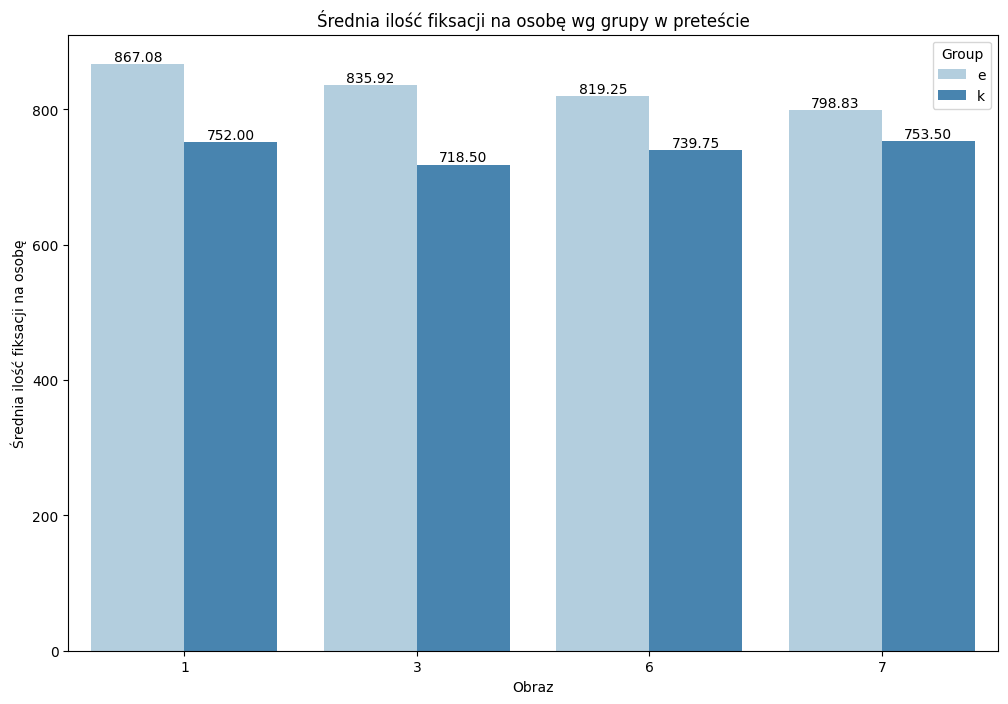

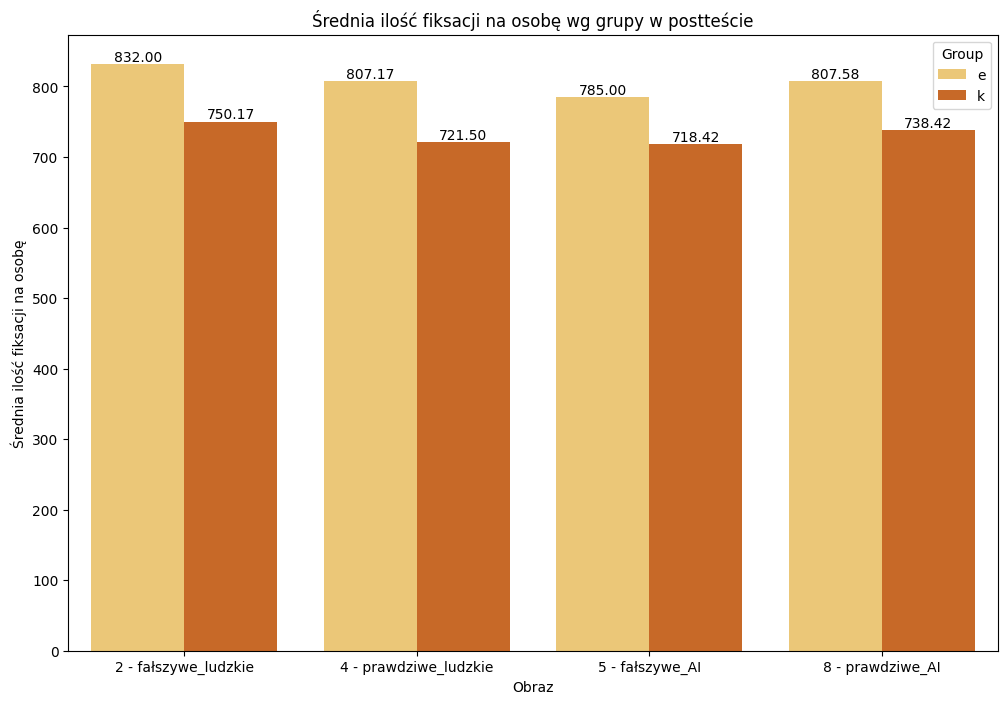

In [36]:
#pretest
plt.figure(figsize=(12,8))
ax = sns.barplot(
    data=avg_fixations[avg_fixations['Painting'].isin([1, 3, 6, 7])],
    x='Painting',
    y='avg_fixations_per_person',
    hue='Group',
    palette='Blues',
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
    
plt.ylabel('Średnia ilość fiksacji na osobę')
plt.xlabel('Obraz')
plt.title('Średnia ilość fiksacji na osobę wg grupy w preteście')
plt.show()

#posttest
avg_fixations['Obraz_typ'] = avg_fixations['Painting'].astype(str) + ' - ' + avg_fixations['typ_podpisu']
#posttest
plt.figure(figsize=(12,8))
ax = sns.barplot(
    data=avg_fixations[avg_fixations['Painting'].isin([2, 4, 5, 8])],
    x='Obraz_typ',
    y='avg_fixations_per_person',
    hue='Group',
    palette='YlOrBr',
   
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
    
plt.ylabel('Średnia ilość fiksacji na osobę')
plt.xlabel('Obraz')
plt.title('Średnia ilość fiksacji na osobę wg grupy w postteście')
plt.show()

Wnioski
- Grupa eksperymentalna wykonuje więcej fiksacji niż kontrolna, niezależnie od etapu badania czy typu obrazu
- Może to wynikać z ogólnych różnic między grupami, a nie z samej manipulacji

### Test statystyczny

In [31]:
#pretest
print("PRETEST\n")
for painting in [1, 3, 6, 7]:
    print(f"Obraz {painting}")
    pretest_data = fixation_counts[fixation_counts['Painting'] == painting]
    grupa_e = pretest_data[pretest_data['Group'] == 'e']['fixation_count']
    grupa_k = pretest_data[pretest_data['Group'] == 'k']['fixation_count']

    #sprawdzamy znów najpierw normalność
    s1 = shapiro(grupa_k)
    s2 = shapiro(grupa_e)
    print(f"  Shapiro kontrolna: p = {s1.pvalue:}")
    print(f"  Shapiro eksperymentalna: p = {s2.pvalue:}")
    
    #dobór testu (jeśli pvalue <0.005 - dane odbiegają od normalności), w przeciwnym wypadku - rozkład normalny (brak podstaw, aby odrzucić normalność)
    if s1.pvalue > 0.05 and s2.pvalue > 0.05:
        stat, p = ttest_ind(grupa_k, grupa_e)
        test = "t-test"
    else:
        stat, p = mannwhitneyu(grupa_k, grupa_e)
        test = "Mann-Whitney U"
    print(f"{test}: stat={stat:.3f}, p={p:.4f}\n")

#posttest
print("POSTTEST\n")
for painting in [2,4,5,8]:
    print(f"Obraz {painting}")
    posttest_data = fixation_counts[fixation_counts['Painting'] == painting]
    grupa_e = posttest_data[posttest_data['Group'] == 'e']['fixation_count']
    grupa_k = posttest_data[posttest_data['Group'] == 'k']['fixation_count']

    #sprawdzamy znów najpierw normalność
    s1 = shapiro(grupa_k)
    s2 = shapiro(grupa_e)
    print(f"  Shapiro kontrolna: p = {s1.pvalue:}")
    print(f"  Shapiro eksperymentalna: p = {s2.pvalue:}")
    
    #dobór testu (jeśli pvalue <0.005 - dane odbiegają od normalności), w przeciwnym wypadku - rozkład normalny (brak podstaw, aby odrzucić normalność)
    if s1.pvalue > 0.05 and s2.pvalue > 0.05:
        stat, p = ttest_ind(grupa_k, grupa_e)
        test = "t-test"
    else:
        stat, p = mannwhitneyu(grupa_k, grupa_e)
        test = "Mann-Whitney U"
    print(f"{test}: stat={stat:.3f}, p={p:.10f}\n")

PRETEST

Obraz 1
  Shapiro kontrolna: p = 0.9229361776000984
  Shapiro eksperymentalna: p = 0.4319970855727489
t-test: stat=-5.181, p=0.0000

Obraz 3
  Shapiro kontrolna: p = 0.007050609368262083
  Shapiro eksperymentalna: p = 0.0002593586967084355
Mann-Whitney U: stat=25.500, p=0.0079

Obraz 6
  Shapiro kontrolna: p = 0.05228495019895641
  Shapiro eksperymentalna: p = 0.28534803972793044
t-test: stat=-3.225, p=0.0039

Obraz 7
  Shapiro kontrolna: p = 0.009560370611037258
  Shapiro eksperymentalna: p = 0.7571566784433019
Mann-Whitney U: stat=41.000, p=0.0781

POSTTEST

Obraz 2
  Shapiro kontrolna: p = 0.6288642384113754
  Shapiro eksperymentalna: p = 0.3089337200096223
t-test: stat=-5.457, p=0.0000175430

Obraz 4
  Shapiro kontrolna: p = 0.0003128886524154721
  Shapiro eksperymentalna: p = 0.661184470657376
Mann-Whitney U: stat=11.000, p=0.0004776817

Obraz 5
  Shapiro kontrolna: p = 0.0017890696717651304
  Shapiro eksperymentalna: p = 0.3820035780621554
Mann-Whitney U: stat=41.000, p=

Wnioski:
- Dla większości obrazów (poza Obrazem 7 w preteście i Obrazem 5 w postteście) występują istotne różnice między grupami w liczbie fiksacji
- może to sugerować, że przynależność do grupy (eksperymentalna vs kontrolna) wiąże się z różnym stylem eksploracji wzrokowej — zarówno przed, jak i po manipulacji
- Ponieważ różnice widać już w preteście, mogą one wynikać z bazowych różnic między grupami, a nie samej manipulacji

## Ile była średnia długość fiksacji na 1 osobę w obrębie danej grupy dla każdego obrazu?

In [38]:
# Zaczniemy od zliczania średniego czasu fiksacji - grupujemy wg osoby, grupy i obrazu (+typ_podpisu)
fixation_duration = (merged_df[merged_df['Eye movement type'] == 'Fixation'].groupby(['Group', 'Painting', 'ID', 'typ_podpisu'])['Eye movement event duration'].mean().reset_index(name='avg_fixation_duration'))

# Liczymy średni czas fiksacji ze względu na grupę i obraz
avg_fixation_duration = (fixation_duration.groupby(['Group', 'Painting', 'typ_podpisu'])['avg_fixation_duration'].mean().reset_index(name='mean_fixation_duration_per_person'))

avg_fixation_duration

,Group,Painting,typ_podpisu,mean_fixation_duration_per_person
0,e,1,nieznane_AI,411.746309
1,e,2,fałszywe_ludzkie,345.311095
2,e,3,nieznane_ludzkie,320.539306
3,e,4,prawdziwe_ludzkie,327.831498
4,e,5,fałszywe_AI,326.402202
5,e,6,nieznane_ludzkie,493.324463
6,e,7,nieznane_AI,405.279245
7,e,8,prawdziwe_AI,421.078369
8,k,1,nieznane_AI,456.408305
9,k,2,fałszywe_ludzkie,342.239448


### Wizualizacja

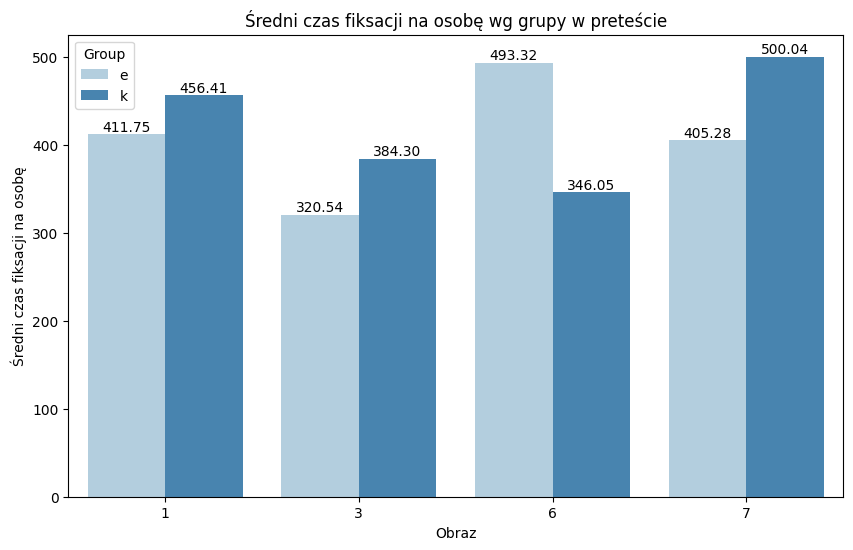

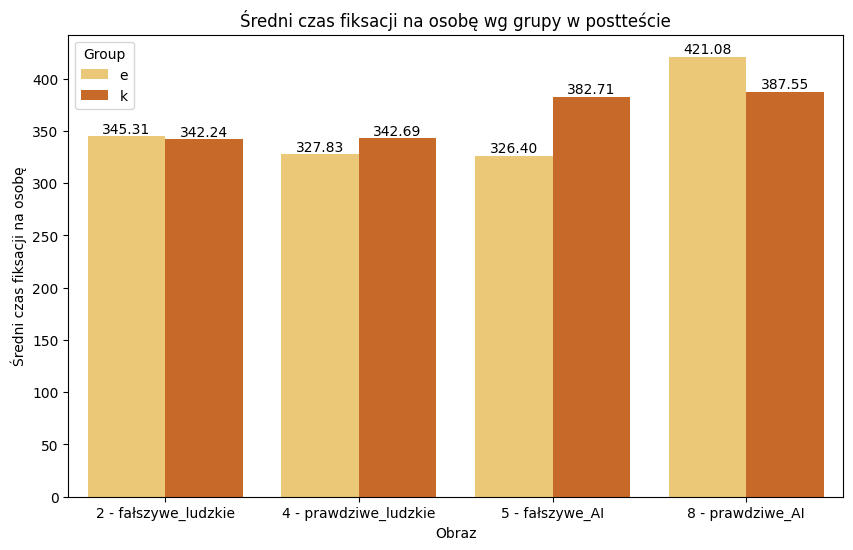

In [39]:
#pretest
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=avg_fixation_duration[avg_fixation_duration['Painting'].isin([1, 3, 6, 7])],
    x='Painting',
    y='mean_fixation_duration_per_person',
    hue='Group',
    palette='Blues'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
    
plt.ylabel('Średni czas fiksacji na osobę')
plt.xlabel('Obraz')
plt.title('Średni czas fiksacji na osobę wg grupy w preteście')
plt.show()

#posttest

avg_fixation_duration['Obraz_typ'] = avg_fixation_duration['Painting'].astype(str) + ' - ' + avg_fixation_duration['typ_podpisu']

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=avg_fixation_duration[avg_fixation_duration['Painting'].isin([2, 4, 5, 8])],
    x='Obraz_typ',
    y='mean_fixation_duration_per_person',
    hue='Group',
    palette='YlOrBr',
   
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
    
plt.ylabel('Średni czas fiksacji na osobę')
plt.xlabel('Obraz')
plt.title('Średni czas fiksacji na osobę wg grupy w postteście')
plt.show()

Wnioski:
- Nie ma spójnego wzorca: czasem dłuższe fiksacje ma grupa kontrolna, a czasem eksperymentalna
- W preteście grupa kontrolna częściej miała dłuższe fiksacje (z wyjątkiem obrazu 6)
- W postteście różnice są mniejsze i mniej regularne
- przynależność do grupy nie wpływa jednoznacznie na średni czas fiksacji

### Test statystyczny

In [34]:
#pretest
print("PRETEST\n")
for painting in [1, 3, 6, 7]:
    print(f"Obraz {painting}")
    pretest_data = fixation_duration[fixation_duration['Painting'] == painting]
    grupa_e = pretest_data[pretest_data['Group'] == 'e']['avg_fixation_duration']
    grupa_k = pretest_data[pretest_data['Group'] == 'k']['avg_fixation_duration']

    #sprawdzamy znów najpierw normalność
    s1 = shapiro(grupa_k)
    s2 = shapiro(grupa_e)
    print(f"  Shapiro kontrolna: p = {s1.pvalue:}")
    print(f"  Shapiro eksperymentalna: p = {s2.pvalue:}")
    
    #dobór testu (jeśli pvalue <0.005 - dane odbiegają od normalności), w przeciwnym wypadku - rozkład normalny (brak podstaw, aby odrzucić normalność)
    if s1.pvalue > 0.05 and s2.pvalue > 0.05:
        stat, p = ttest_ind(grupa_k, grupa_e)
        test = "t-test"
    else:
        stat, p = mannwhitneyu(grupa_k, grupa_e)
        test = "Mann-Whitney U"
    print(f"{test}: stat={stat:.3f}, p={p:.4f}\n")

#posttest
print("POSTTEST\n")
for painting in [2,4,5,8]:
    print(f"Obraz {painting}")
    posttest_data = fixation_duration[fixation_duration['Painting'] == painting]
    grupa_e = posttest_data[posttest_data['Group'] == 'e']['avg_fixation_duration']
    grupa_k = posttest_data[posttest_data['Group'] == 'k']['avg_fixation_duration']

    #sprawdzamy znów najpierw normalność
    s1 = shapiro(grupa_k)
    s2 = shapiro(grupa_e)
    print(f"  Shapiro kontrolna: p = {s1.pvalue:}")
    print(f"  Shapiro eksperymentalna: p = {s2.pvalue:}")
    
    #dobór testu (jeśli pvalue <0.005 - dane odbiegają od normalności), w przeciwnym wypadku - rozkład normalny (brak podstaw, aby odrzucić normalność)
    if s1.pvalue > 0.05 and s2.pvalue > 0.05:
        stat, p = ttest_ind(grupa_k, grupa_e)
        test = "t-test"
    else:
        stat, p = mannwhitneyu(grupa_k, grupa_e)
        test = "Mann-Whitney U"
    print(f"{test}: stat={stat:.3f}, p={p:.10f}\n")

PRETEST

Obraz 1
  Shapiro kontrolna: p = 0.0002024367202350499
  Shapiro eksperymentalna: p = 0.00013984532626665173
Mann-Whitney U: stat=99.000, p=0.1260

Obraz 3
  Shapiro kontrolna: p = 0.0030389480196046717
  Shapiro eksperymentalna: p = 0.2767673460479474
Mann-Whitney U: stat=76.000, p=0.8399

Obraz 6
  Shapiro kontrolna: p = 0.4352551242450523
  Shapiro eksperymentalna: p = 4.855869569084745e-06
Mann-Whitney U: stat=73.000, p=0.9770

Obraz 7
  Shapiro kontrolna: p = 0.007958517373191903
  Shapiro eksperymentalna: p = 0.002022281249440583
Mann-Whitney U: stat=81.000, p=0.6236

POSTTEST

Obraz 2
  Shapiro kontrolna: p = 0.5794146652166134
  Shapiro eksperymentalna: p = 0.0024224779336817883
Mann-Whitney U: stat=87.000, p=0.4025038238

Obraz 4
  Shapiro kontrolna: p = 0.22224481042326688
  Shapiro eksperymentalna: p = 0.1409963094170854
t-test: stat=0.389, p=0.7013639854

Obraz 5
  Shapiro kontrolna: p = 0.21884243453290314
  Shapiro eksperymentalna: p = 0.2507834786970958
t-test: 

Wnioski:
- nie istnieje żaden istotny statystycznie wpływ (wszystkie p-values są więsze od 0.05) na średnic zas fiksacji, niezależnie od grupy ani pretestu/posttestu

To wszystko sugeruje też, że mimo iż ilość sakkad i fiksacji mogła się różnić pomiędzy grupami, średni czas każdej fiksacji jest podobny w obu grupach, wśród wszystkich obrazów

## Jak długi był czas fiksacji na obrazach vs na podpisach

Dla każdego obrazu, wg grupy (e/k)

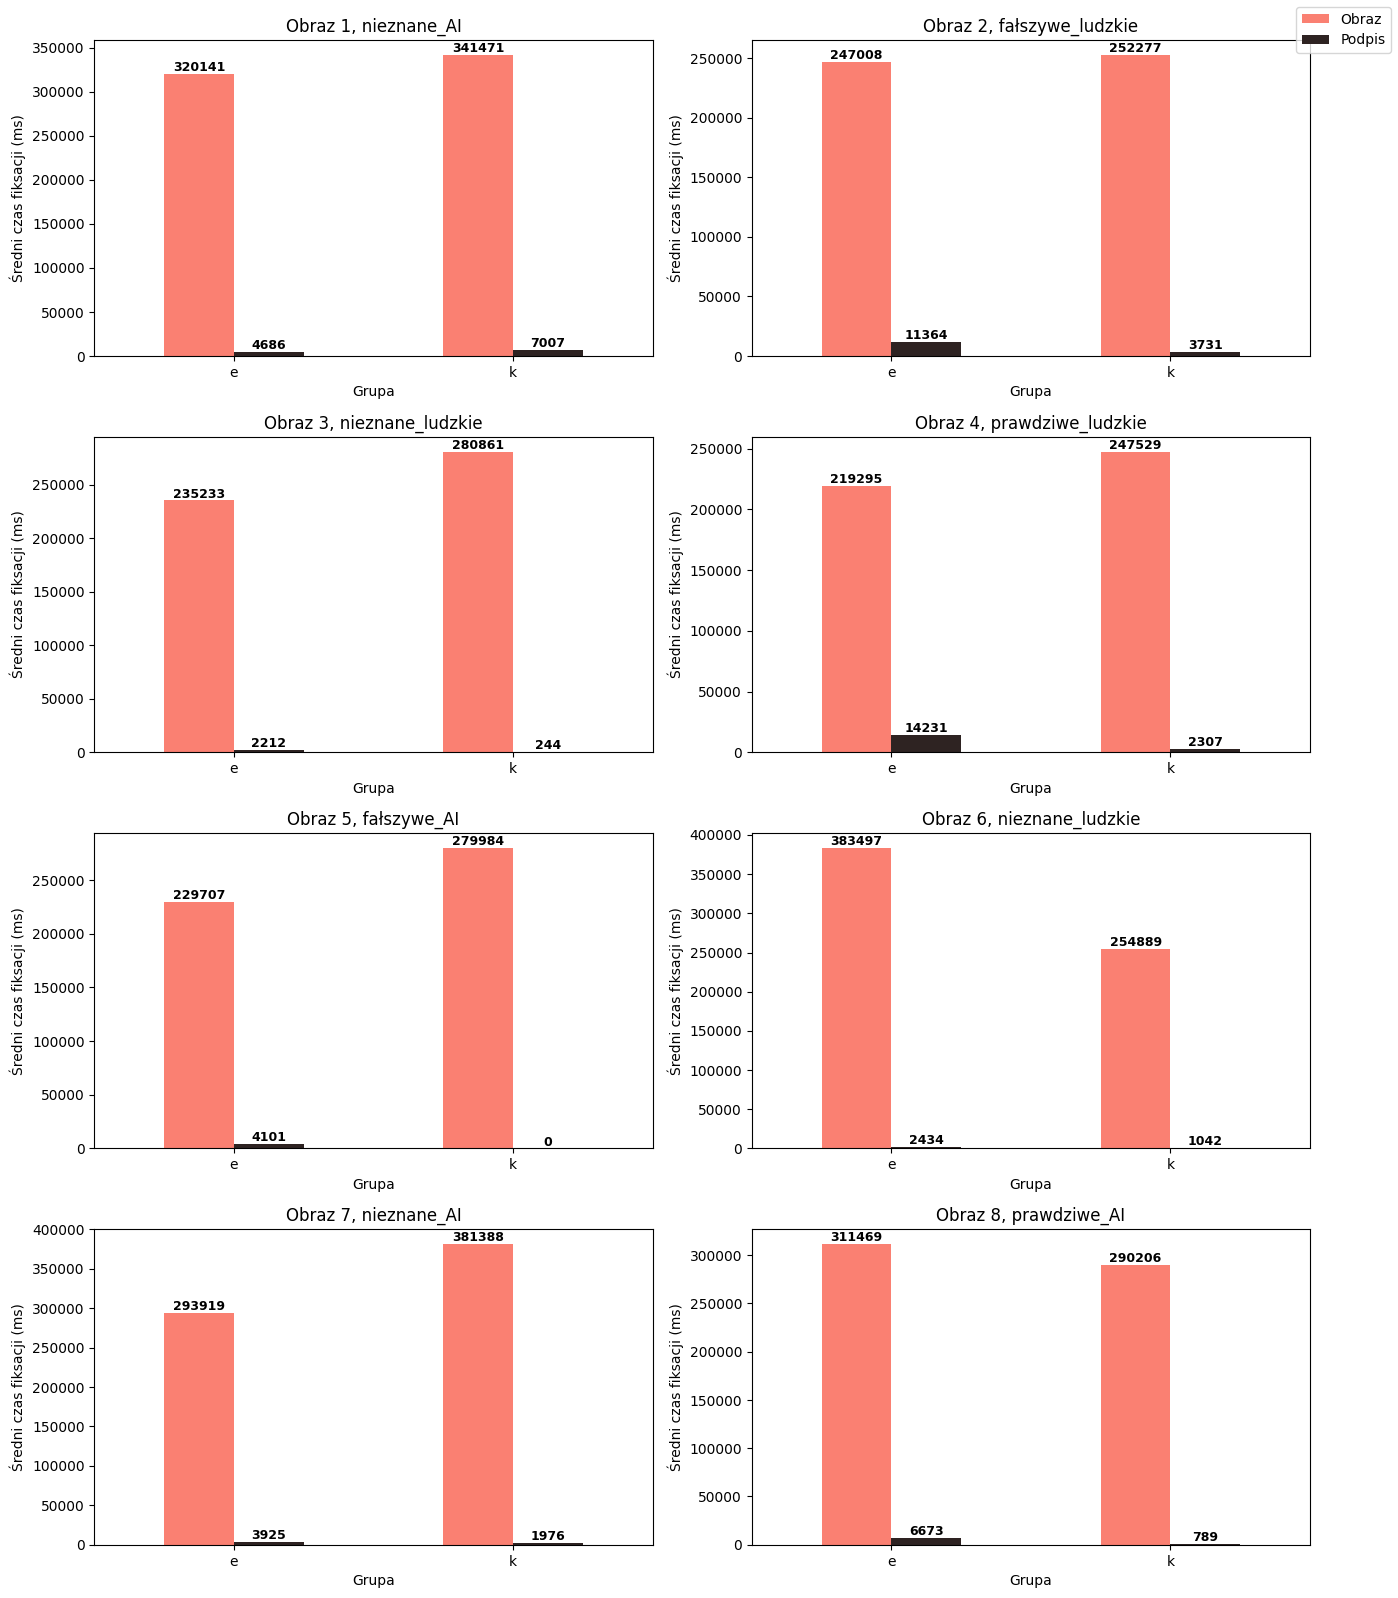

In [41]:
#filtrujemy, by zobaczyć tylko fiksacje
fix_df = merged_df[merged_df['Eye movement type'] == 'Fixation'].copy()

#kolumny z obrazami vs kolumny z podpisami (AoI)
obraz_cols = []
podpis_cols = []

for col in fix_df.columns:
    if 'AOI hit' in col:
        if 'obraz' in col and 'podpis' not in col:
            obraz_cols.append(col)
        if 'podpis' in col:
            podpis_cols.append(col)

#sprawdzamy, czy trafiliśmy w AoI
fix_df['AOI_obraz'] = fix_df[obraz_cols].max(axis=1)
fix_df['AOI_podpis'] = fix_df[podpis_cols].max(axis=1)

#Dla każdej fiksacji - dodajemy czas trwania (obraz/podpis)
fix_df['fix_time_obraz'] = fix_df['Eye movement event duration'] * fix_df['AOI_obraz']
fix_df['fix_time_podpis'] = fix_df['Eye movement event duration'] * fix_df['AOI_podpis']

#Dla każdego uczestnika, obrazu i grupy, sumujemy całkowity czas spędzony na patrzeniu na obraz i podpis
fix_time_sum = fix_df.groupby(['Painting', 'Group', 'ID'])[['fix_time_obraz', 'fix_time_podpis']].sum().reset_index()

#Obliczamy średni czas spędzony na obrazie i podpisie dla każdej grupy i obrazu
painting_group_means = fix_time_sum.groupby(['Painting', 'Group'])[['fix_time_obraz', 'fix_time_podpis']].mean().reset_index()

# Dodanie typu podpisu
painting_to_typ_podpisu = merged_df[['Painting', 'typ_podpisu']].drop_duplicates()
painting_group_means = painting_group_means.merge(painting_to_typ_podpisu, on='Painting', how='left')

#wizualizacja
paintings = sorted(painting_group_means['Painting'].unique())
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

for i, painting in enumerate(paintings):
    ax = axes[i]
    data = painting_group_means[painting_group_means['Painting'] == painting].set_index('Group')[['fix_time_obraz', 'fix_time_podpis']]
    typ_podpisu = painting_group_means[painting_group_means['Painting'] == painting]['typ_podpisu'].iloc[0]
    data.plot(kind='bar', ax=ax, legend=False, color=sns.color_palette("dark:salmon_r", 2))
    ax.set_title(f'Obraz {painting}, {typ_podpisu}')
    ax.set_ylabel('Średni czas fiksacji (ms)')
    ax.set_xlabel('Grupa')
    ax.set_xticklabels(data.index, rotation=0)
    # Add values above bars
    for p in ax.patches:
        value = int(p.get_height())
        if not pd.isna(p.get_height()):
            ax.annotate(f'{value}', 
                        (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, ['Obraz', 'Podpis'], loc='upper right')

plt.tight_layout(rect=[0, 0, 0.95, 1])

plt.savefig('visualization.png', dpi=300, bbox_inches='tight')

plt.show()

Wnioski:
- w grupie kontrolnej czas fiksacji na podpisie zmalał, gdy badani zaczęli zauważać powtarzający się schemat
- w grupie eksperymentalnej więcej czasu spędzano na obrazie, kiedy wprowadzano nowy bodziec - nowy podpis (1, 2, 4)
- znów w 8 często stosunkowo dużo czasu poświęcano na podpis (grupa eksperymentalna)
- obrazy z najiekszym czasem fiskacji to obrazy 1 (zarówno e i k), 6 (e), 7(k), 8 (e). Może być to też spowodowane specyfiką styló tych obrazów

## Kierunek sakkad (pomiędzy AoI)

Pokażemy dla każdego obrazu liczbę sakkad, w których wzrok uczestnika przesunął się:
- z obrazu na podpis 
- z podpisu na obraz 

<Figure size 1200x600 with 0 Axes>

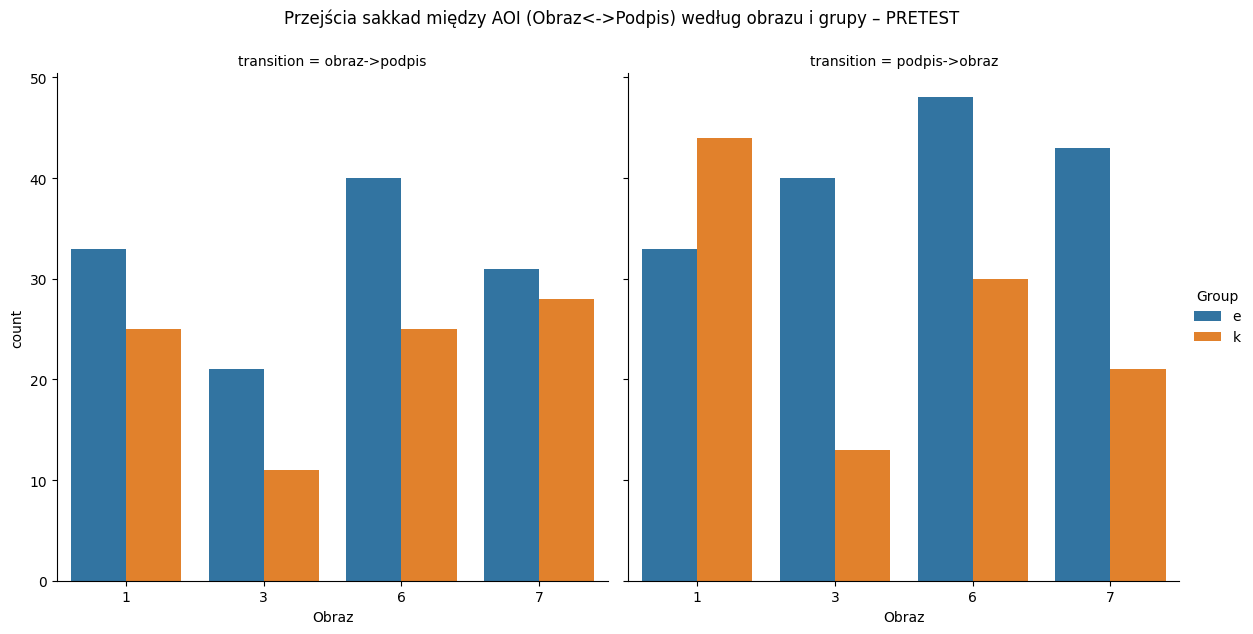

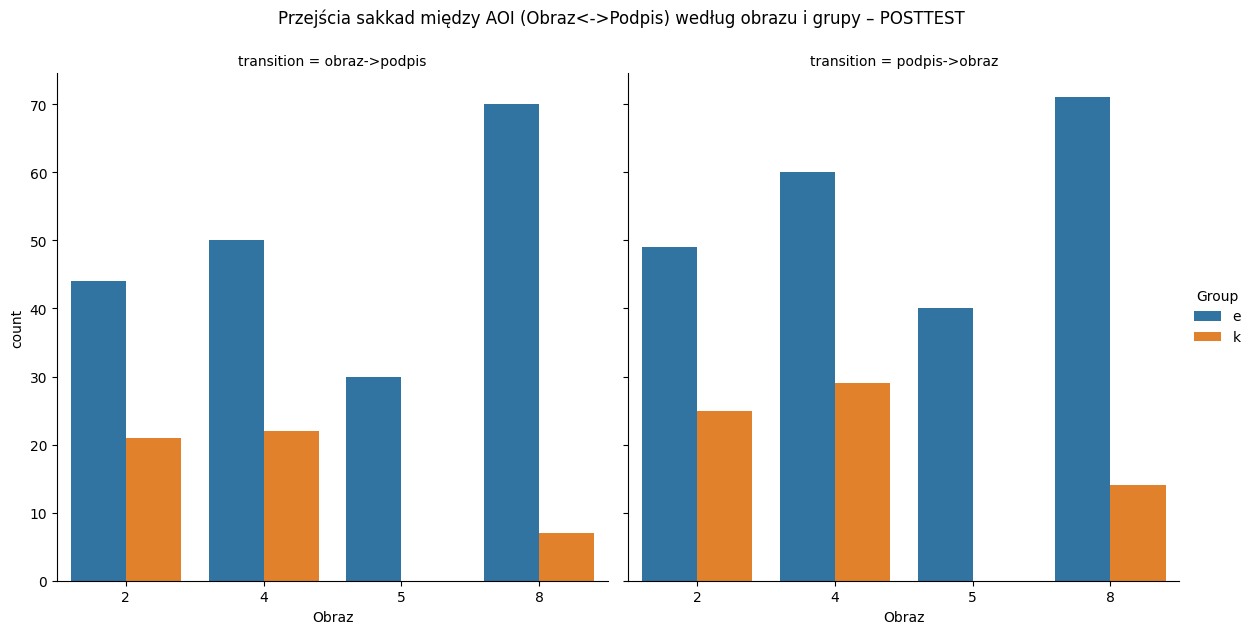

In [43]:
# Przypisanie AoI do fiksacji
fixations = merged_df[merged_df['Eye movement type'] == 'Fixation'].copy()
fixations['AOI'] = np.where(fixations[obraz_cols].max(axis=1) == 1, 'obraz',
                    np.where(fixations[podpis_cols].max(axis=1) == 1, 'podpis', 'obraz'))
fixations = fixations[['ID', 'Painting', 'Recording timestamp', 'AOI']]

# uporządkowanie sakkad
saccades = merged_df[merged_df['Eye movement type'] == 'Saccade'].copy()
saccades = saccades.sort_values(['ID', 'Painting', 'Recording timestamp'])

# dla każdej sakkady znajdujemy poprzednią i kolejną fiksację
def find_prev_next_aoi(sac_row, fix_df):
    # Wybieramy fiksacje tego samego uczestnika i tego samego obrazu
    fixs = fix_df[fix_df['ID'] == sac_row['ID']]
    fixs = fixs[fixs['Painting'] == sac_row['Painting']]
    
    #szukamy fiksacji, które były przed sakkadą
    prev_fix = fixs[fixs['Recording timestamp'] < sac_row['Recording timestamp']]
    if len(prev_fix) > 0:
        aoi_start = prev_fix.iloc[-1]['AOI']  #ostatnia fiksacja przed sakkadą
    else:
        aoi_start = None  # brak wcześniejszej fiksacji
    
    #szukamy fiksacji, które były po sakkadzie
    next_fix = fixs[fixs['Recording timestamp'] > sac_row['Recording timestamp']]
    if len(next_fix) > 0:
        aoi_end = next_fix.iloc[0]['AOI']  #pierwsza fiksacja po sakkadzie
    else: #brak późniejszej fiksacji
        aoi_end = None  
    
    return pd.Series({'AOI_start': aoi_start, 'AOI_end': aoi_end})

saccades[['AOI_start', 'AOI_end']] = saccades.apply(find_prev_next_aoi, axis=1, fix_df=fixations)
saccades['transition'] = saccades['AOI_start'] + '->' + saccades['AOI_end']

#Zliczamy przejścia
transition_counts = (saccades.groupby(['Painting', 'Group', 'transition']).size().reset_index(name='count'))

#przejscia obraz -> podpis | podpis -> obraz
transition_counts = transition_counts[
    transition_counts['transition'].isin(['obraz->podpis', 'podpis->obraz'])
]

transition_counts = transition_counts.rename(columns={"Painting":"Obraz"})

plt.figure(figsize=(12,6))
sns.catplot(
    data=transition_counts[transition_counts['Obraz'].isin([1, 3, 6, 7])],
    x='Obraz',
    y='count',
    hue='Group',
    col='transition',
    kind='bar',
    height=6,
    aspect=1
)
plt.suptitle('Przejścia sakkad między AOI (Obraz<->Podpis) według obrazu i grupy – PRETEST', y=1.05)
plt.show()


sns.catplot(
    data=transition_counts[transition_counts['Obraz'].isin([2, 4, 5, 8])],
    x='Obraz',
    y='count',
    hue='Group',
    col='transition',
    kind='bar',
    height=6,
    aspect=1
)
plt.suptitle('Przejścia sakkad między AOI (Obraz<->Podpis) według obrazu i grupy – POSTTEST', y=1.05)
plt.show()

Wnioski:
- W grupie eksperymentalnej odnotowano więcej przejść między podpisem a obrazem, co może świadczyć o większym przyciąganiu uwagi przez podpis
- pierwsze dwa obrazy z podpisami warto pominąć w analizie ogólnej – były to obrazy początkowe lub pierwsze z nowym bodźcem, co mogło zaburzyć wyniki.
- w preteście grupy eksperymentalnej liczba przejść rosła, szczególnie przy obrazie 6 (podpis "nieznane"), co może wskazywać na większe zaangażowanie lub niepewność
- Obraz 8 cechował się wyjątkowo dużą liczbą przejść – być może jego autorstwo było szczególnie zaskakujące
- W przypadku obrazu 5 w postteście brak fiksacji na podpisie może nie być błędem, lecz efektem pominięcia podpisu przez uczestników

## Czas do pierwszej fiksacji (Time to First Fixation)

Policzymy czas do pierwszej fiksacji. Pierwszą fiksacją dla wszystkich badanych zawsze był obraz - skupimy się więc tylko zatem na podpisie (ttff_podpis)

   Group  Painting    ttff_obraz   ttff_podpis
0      e         1  2.323272e+06  3.305874e+06
1      e         2  1.740370e+06  3.600650e+06
2      e         3  1.532193e+06  2.521932e+06
3      e         4  1.703280e+06  3.447439e+06
4      e         5  1.297518e+06  2.567783e+06
5      e         6  1.804212e+06  3.045879e+06
6      e         7  1.509989e+06  5.255345e+06
7      e         8  1.495856e+06  5.285460e+06
8      k         1  0.000000e+00  7.431962e+05
9      k         2  0.000000e+00  2.124612e+06
10     k         3  0.000000e+00  3.647305e+06
11     k         4  0.000000e+00  6.511809e+06
12     k         6  0.000000e+00  4.634647e+06
13     k         7  0.000000e+00  1.096406e+06
14     k         8  0.000000e+00  5.062918e+06


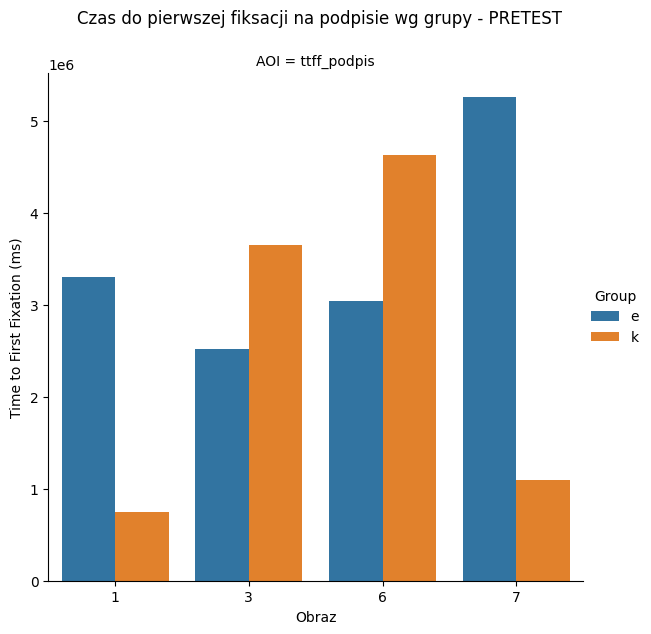

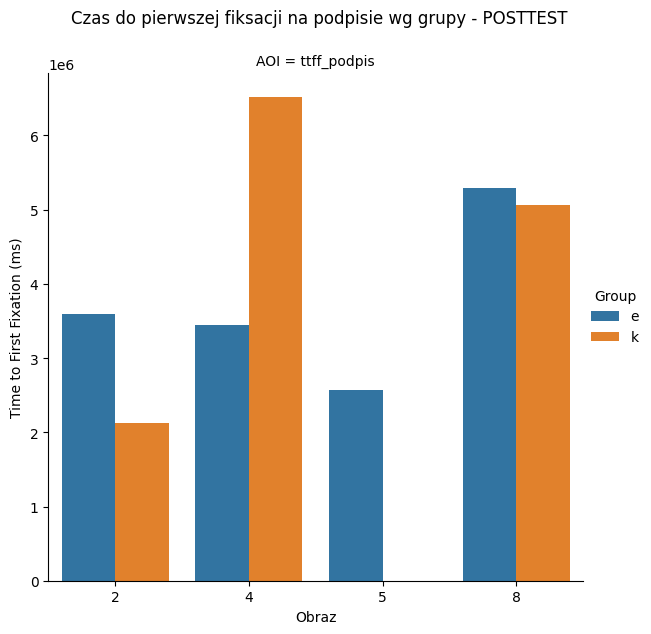

In [44]:
# Przypisanie AoI do fiksacji
fix_df = merged_df[merged_df['Eye movement type'] == 'Fixation'].copy()
fix_df['AOI'] = np.where(fix_df[obraz_cols].max(axis=1) == 1, 'obraz',
                    np.where(fix_df[podpis_cols].max(axis=1) == 1, 'podpis', 'obraz'))
fix_df = fixations[['ID', 'Painting', 'Recording timestamp', 'AOI']]

# Filtrowanie fiksacji (nie interesują nas ruchy między spojrzeniami)
fix_df = merged_df[merged_df['Eye movement type'] == 'Fixation'].copy()

# Wyszukujemy kolumny związane z AOI obrazów i podpisów
obraz_cols = [col for col in fix_df.columns if 'AOI hit' in col and 'obraz' in col and 'podpis' not in col]
podpis_cols = [col for col in fix_df.columns if 'AOI hit' in col and 'podpis' in col]

#Oznaczamy, czy dana fiksacja trafiła w obraz lub podpis
fix_df['AOI_obraz'] = fix_df[obraz_cols].max(axis=1)
fix_df['AOI_podpis'] = fix_df[podpis_cols].max(axis=1)

# Szukamy pierwszej fiksacji na obraz i na podpis dla każdej osoby i obrazu
first_fix_obraz = (
    fix_df[fix_df['AOI_obraz'] == 1]
    .groupby(['ID', 'Painting', 'Group'])['Recording timestamp']
    .min()
    .reset_index(name='first_fix_obraz')
)
first_fix_podpis = (
    fix_df[fix_df['AOI_podpis'] == 1]
    .groupby(['ID', 'Painting', 'Group'])['Recording timestamp']
    .min()
    .reset_index(name='first_fix_podpis')
)

# scalamy wyniki
first_fix = pd.merge(first_fix_obraz, first_fix_podpis, on=['ID', 'Painting', 'Group'], how='outer')

#Obliczamy czas do pierwszej fiksacji (czyli różnicę względem początku oglądania obrazu)
first_event = (
    fix_df.groupby(['ID', 'Painting', 'Group'])['Recording timestamp']
    .min()
    .reset_index(name='first_event')
)
fix_df['Recording timestamp'] = pd.to_numeric(fix_df['Recording timestamp'], errors='coerce')

first_fix = pd.merge(first_fix, first_event, on=['ID', 'Painting', 'Group'], how='left')
first_fix['ttff_obraz'] = first_fix['first_fix_obraz'] - first_fix['first_event']
first_fix['ttff_podpis'] = first_fix['first_fix_podpis'] - first_fix['first_event']
first_fix = first_fix.dropna(subset=['first_fix_podpis'])


# Obliczamy średni czas do 1. fiksacji dla każdej grupy i obrazu
ttff_summary = first_fix.groupby(['Group', 'Painting'])[['ttff_obraz', 'ttff_podpis']].mean().reset_index()
print(ttff_summary)

#Przygotowanie danych do wykresu
ttff_summary_melted = ttff_summary.melt(
    id_vars=['Group', 'Painting'],
    value_vars=['ttff_podpis'],
    var_name='AOI',
    value_name='Time to First Fixation (ms)'
)

#Wizualizacja

#PRETEST:
sns.catplot(
    data=ttff_summary_melted[ttff_summary_melted['Painting'].isin([1,3,6,7])],
    x='Painting',
    y='Time to First Fixation (ms)',
    hue='Group',
    col='AOI',
    kind='bar',
    height=6,
    aspect=1
)
plt.suptitle('Czas do pierwszej fiksacji na podpisie wg grupy - PRETEST', y=1.05)
plt.xlabel('Obraz')
plt.show()

#POSTTEST
sns.catplot(
    data=ttff_summary_melted[ttff_summary_melted['Painting'].isin([2,4,5,8])],
    x='Painting',
    y='Time to First Fixation (ms)',
    hue='Group',
    col='AOI',
    kind='bar',
    height=6,
    aspect=1
)
plt.suptitle('Czas do pierwszej fiksacji na podpisie wg grupy - POSTTEST', y=1.05)
plt.xlabel('Obraz')
plt.show()